# Analysis

## Social Signature

We can calculate a social signature from email activity. First we'll load the example email data from the sample data.

In [1]:
import os
import niimpy
from niimpy import config

path = os.path.join(config.GOOGLE_TAKEOUT_DIR, "Takeout", "Mail", "All mail Including Spam and Trash.mbox")
data = niimpy.reading.google_takeout.email_activity(path, sentiment=False)

/u/24/rantahj1/unix/src/niimpy/niimpy/reading/google_takeout.py:491: UserWarning: Could not parse message timestamp: 2023-12-15 12:19:43+00:00
  warnings.warn(f"Could not parse message timestamp: {received}")
/u/24/rantahj1/unix/src/niimpy/niimpy/reading/google_takeout.py:505: UserWarning: Failed to format received time: Sat, 15 DeNot a timec 2023 12:19:43 0000
  warnings.warn(f"Failed to format received time: {received}")


Email data contains a "to" and and a "from" column. This data is
pseudonymized: the email addresses are replaced by integer ids.
The user is represented as ID 0.

In [2]:
data[["from", "to"]]

,from,to
timestamp,,
2023-12-15 12:19:43+00:00,0,[6]
2023-12-15 12:29:43+00:00,0,"[2, 6]"
2023-12-15 12:29:43+00:00,0,"[2, 6]"
2023-12-15 12:39:43+00:00,2,[0]
2023-12-15 12:39:43+00:00,2,[0]


In [3]:
import niimpy.analysis.social_signature

niimpy.analysis.social_signature.social_signature(data)

to
2    0.4
6    0.6
dtype: float64

## Rythms

The `rythm` function in `niimpy.analysis.rhythms` calculates general rhythms from different types of input data. It
 - Resamples the data into bins. For example, if the bin is 1 day, each row will represent a day.
 - Accumulates the binned historical data to a certain time period. For example, if the period is a week and the bin is a day, the first row will be the sum of data for the first day of the week, the second row the sum for the second day of the week and so on.
 - Calculate the percentage each bin represents of a third period, frequency. In the above example, if the frequency is 2 days, the data of the first two rows is scaled to sum to 1.

In [4]:
data = niimpy.read_csv(config.MULTIUSER_AWARE_CALLS_PATH, tz='Europe/Helsinki')
data = data[data["user"] == 'iGyXetHE3S8u']
data.head()

,user,device,time,call_type,call_duration,datetime
2019-08-08 22:32:25.256999969+03:00,iGyXetHE3S8u,Cq9vueHh3zVs,1.565293e+09,incoming,1217,2019-08-08 22:32:25.256999969+03:00
2019-08-08 22:53:35.107000113+03:00,iGyXetHE3S8u,Cq9vueHh3zVs,1.565294e+09,incoming,383,2019-08-08 22:53:35.107000113+03:00
2019-08-08 22:31:34.539999962+03:00,iGyXetHE3S8u,Cq9vueHh3zVs,1.565293e+09,incoming,1142,2019-08-08 22:31:34.539999962+03:00
2019-08-08 22:43:45.834000111+03:00,iGyXetHE3S8u,Cq9vueHh3zVs,1.565293e+09,incoming,1170,2019-08-08 22:43:45.834000111+03:00
2019-08-08 22:55:33.053999901+03:00,iGyXetHE3S8u,Cq9vueHh3zVs,1.565294e+09,incoming,497,2019-08-08 22:55:33.053999901+03:00


<Axes: >

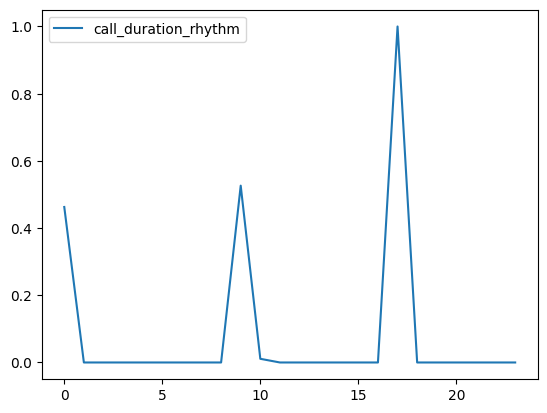

In [5]:
from niimpy.analysis.rhythms import rhythm

duration_rhythm = rhythm(data, cols=["call_duration"], period="1D", freq="12h", bin="1h")
duration_rhythm.plot()